# Argovis explore vertical structure of ocean fields

This notebook contains some examples and is a work in progress: code will transition from here to other notebooks. Public consumers should focus on our educational notebooks, starting with [Intro to Argovis](https://github.com/argovis/demo_notebooks/blob/main/Intro_to_Argovis.ipynb).

In [1]:
from argovisHelpers import helpers as avh
import datetime #, pandas, matplotlib, scipy, numpy
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import cm
#import cartopy.crs as ccrs

from Argovis_tasks_helpers import get_route, get_profiles_in_regions_and_horiz_ave
from Argovis_tasks_helpers import profiles_in_regions_and_horiz_ave_plot1d_horiz_ave, profiles_in_regions_and_horiz_ave_plot1d_all, profiles_in_regions_and_horiz_ave_plot1d_all_vert_interp, profiles_in_regions_and_horiz_ave_plot1d_all_col_by_monthgroup

API_KEY=''

/Users/dgiglio/opt/miniconda3/envs/argovis_demos/lib/python3.9/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [2]:
# API call showing collections available for each route

#### parameters the user needs to select
# user selects list of collections to use for the plot

#### for bgc variables we have gridded time mean fields
collections = ['grids/glodap',
              ] # we compare argo profiles with a gridded product

#### for temperature and salinity only we have a monthly product
collections = ['grids/rg09',
              ] # we compare argo profiles with a gridded product

######## show list of variables available
for icollection in collections:
    try:
        print(avh.query(icollection+'/vocabulary', options={'parameter': 'data'}, verbose='true',apikey=API_KEY, apiroot=get_route(icollection)) )
    except:
        print('No data parameter for vocabulary query')
    try:
        bfr = avh.query(icollection+'/vocabulary', verbose='true',apikey=API_KEY, apiroot=get_route(icollection))
        print(*bfr[0]['data'],sep=',')
    except:
        print('Needs data parameter for vocabulary query')
    
## define name of variable of interest for each product (first show list of all variables available for each collection)
varname     = ['rg09_temperature']
varname_qc  = ['']
vartitle    = 'Temperature, degC'

# define name of the variable that includes levels for each collection
varname_levels = [''] # for the gridded product, the level info is in the metadata, i.e. there is no variable in 'data' (for argo, 'pressure' is within the 'data' instead)

# in this example, we will use the 'box' selection (in the next cell),
# hence we indicate here the bottom/left and top/right vertices... 
# the other option is to search in a 'polygon' and indicate the polygon
# vertices in a list (first and last vertex should be the same)
regions_list         = [
                        [[-250.5,-5.5],[-125.5,5.5]],
                        ]
regions_list_type    = 'box'

regions_list_tags    = ['EqPacific']

startDate            = '2004-01-01T00:00:00Z'
endDate              = '2022-12-31T00:00:00Z'

# box_regions_list     = [
#                         [[-78,45],[-10,50]],
#                         [[-180,45],[-127,50]],
#                         ]

https://argovis-api.colorado.edu/grids/rg09/vocabulary?parameter=data
No data parameter for vocabulary query
https://argovis-api.colorado.edu/grids/rg09/vocabulary
rg09_temperature,rg09_salinity


In [4]:
# get data of interest and do horizontal average
!date
data_reg = get_profiles_in_regions_and_horiz_ave(collections=collections,varname=varname,varname_qc=varname_qc,varname_levels=varname_levels,interp_levels=[],regions_list_source=regions_list,regions_list_source_type=regions_list_type,regions_list_source_tags=regions_list_tags,startDate=startDate,endDate=endDate,API_KEY=API_KEY)         
!date    

Fri Apr  5 00:26:11 MDT 2024
>>>>>>> Region [[-250.5, -5.5], [-125.5, 5.5]] , grids/rg09 collection
https://argovis-api.colorado.edu/grids/rg09?data=rg09_temperature&box=%5B%5B-250.5%2C+-5.5%5D%2C+%5B-125.5%2C+5.5%5D%5D&startDate=2004-01-01T00%3A00%3A00.000000Z&endDate=2004-07-06T00%3A00%3A00.000000Z
https://argovis-api.colorado.edu/grids/rg09?data=rg09_temperature&box=%5B%5B-250.5%2C+-5.5%5D%2C+%5B-125.5%2C+5.5%5D%5D&startDate=2004-07-06T00%3A00%3A00.000000Z&endDate=2005-01-09T00%3A00%3A00.000000Z
https://argovis-api.colorado.edu/grids/rg09?data=rg09_temperature&box=%5B%5B-250.5%2C+-5.5%5D%2C+%5B-125.5%2C+5.5%5D%5D&startDate=2005-01-09T00%3A00%3A00.000000Z&endDate=2005-07-15T00%3A00%3A00.000000Z
https://argovis-api.colorado.edu/grids/rg09?data=rg09_temperature&box=%5B%5B-250.5%2C+-5.5%5D%2C+%5B-125.5%2C+5.5%5D%5D&startDate=2005-07-15T00%3A00%3A00.000000Z&endDate=2006-01-18T00%3A00%3A00.000000Z
https://argovis-api.colorado.edu/grids/rg09?data=rg09_temperature&box=%5B%5B-250.5%2C+-5.5%5

Frozen({'latitude': 12, 'longitude': 113, 'levels': 58, 'timestamp': 228})
EqPacific, grids/rg09


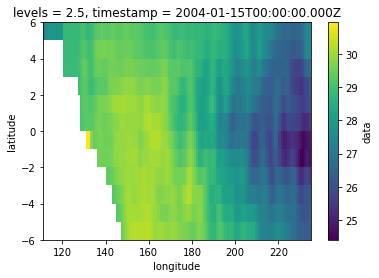

In [5]:
# plot the map for one timestep/level for each of the gridded products
for i,iaxr in enumerate(data_reg['regions_list_data_raw_xarray']):
    if iaxr:
        print(iaxr.sizes)
        print(data_reg['regions_list_tags'][i]+', '+data_reg['regions_list_collections'][i])
        plt.figure()
        iaxr['data'][:,:,0,0].plot()

In [ ]:
len(data_reg['regions_list_data_horiz_ave'])

In [ ]:
cols = ['k','r','b','m']

In [ ]:
# plot the horizontal average for (vertically) interpolated profiles and for the gridded product
profiles_in_regions_and_horiz_ave_plot1d_horiz_ave(data_reg=data_reg,data_reg_cols=cols,xlabel_tag=vartitle)


In [ ]:
# let's look at all the raw profiles that were vertically interpolated (except for the gridded products) to then compute the horizontal average above
profiles_in_regions_and_horiz_ave_plot1d_all(data_reg=data_reg,data_reg_cols=cols,xlabel_tag=vartitle)


In [ ]:
# let's look at all the vertically interpolated profiles that were used to compute the horizontal average above
profiles_in_regions_and_horiz_ave_plot1d_all_vert_interp(data_reg=data_reg,data_reg_cols=cols,xlabel_tag=vartitle)
    

In [ ]:
#https://sites.google.com/view/paztronomer/blog/basic/python-colors
month_groups_cols= ['dodgerblue', 'violet', 'orangered', 'gold']
month_groups     = [[12, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]
month_groups_tags= ['DJF', 'MAM', 'JJA', 'SON']
profiles_in_regions_and_horiz_ave_plot1d_all_col_by_monthgroup(data_reg=data_reg,month_groups=month_groups,month_groups_cols=month_groups_cols,month_groups_tags=month_groups_tags,xlabel_tag=vartitle)


In [ ]:
# bin in time? platform history? woceline? easyocean?